# Collatz Conjecture

# Attempt 1

In [21]:
import numpy as np, pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)


In [2]:
def x3plus1(num):
    num=int(num)
    if num%2==1: #odd number:
        return int(num*3+1)
    else:
        return int(num/2)        

In [4]:
x3plus1(5)

16

In [5]:
max_limit = 1_000_001
df=pd.DataFrame({'seed': np.arange(1, max_limit, 1)})

In [6]:
df['col_1'] = df[df.columns[-1]].apply(x3plus1)

df.head()

,seed,col_1
0,1,4
1,2,1
2,3,10
3,4,2
4,5,16


In [7]:
df['col_2'] = df[df.columns[-1]].apply(x3plus1)

df.head()

,seed,col_1,col_2
0,1,4,2
1,2,1,4
2,3,10,5
3,4,2,1
4,5,16,8


In [8]:
df['col_3'] = df[df.columns[-1]].apply(x3plus1)

df.head()

,seed,col_1,col_2,col_3
0,1,4,2,1
1,2,1,4,2
2,3,10,5,16
3,4,2,1,4
4,5,16,8,4


In [10]:
df['col_4'] = df[df.columns[-1]][~df[df.columns[-1]].isin([0,1])].apply(lambda x: x3plus1(x))
df['col_4'] = df['col_4'].fillna(0).astype(int)
df.head()

,seed,col_1,col_2,col_3,col_4
0,1,4,2,1,0
1,2,1,4,2,0
2,3,10,5,16,4
3,4,2,1,4,1
4,5,16,8,4,1


In [11]:
df['col_5'] = df[df.columns[-1]][~df[df.columns[-1]].isin([0,1])].apply(lambda x: x3plus1(x))
df['col_5'] = df['col_5'].fillna(0).astype(int)
df.head()

,seed,col_1,col_2,col_3,col_4,col_5
0,1,4,2,1,0,0
1,2,1,4,2,0,0
2,3,10,5,16,4,2
3,4,2,1,4,1,0
4,5,16,8,4,1,0


In [12]:
df['col_6'] = df[df.columns[-1]][~df[df.columns[-1]].isin([0,1])].apply(lambda x: x3plus1(x))
df['col_6'] = df['col_6'].fillna(0).astype(int)
df.head()

,seed,col_1,col_2,col_3,col_4,col_5,col_6
0,1,4,2,1,0,0,0
1,2,1,4,2,0,0,0
2,3,10,5,16,4,2,1
3,4,2,1,4,1,0,0
4,5,16,8,4,1,0,0


# Attempt 2

In [1]:
import numpy as np, pandas as pd

In [2]:
def x3plus1(num):
    num=int(num)
    if num%2==1: #odd number:
        return int(num*3+1)
    else:
        return int(num/2)        

In [29]:
%%time
max_limit = 100_000
df=pd.DataFrame({'seed': np.arange(1, max_limit, 1)})
df['step_1'] = df[df.columns[-1]].apply(x3plus1)
df['step_2'] = df[df.columns[-1]].apply(x3plus1)
df['step_3'] = df[df.columns[-1]].apply(x3plus1)

step = 4
while df[df.columns[-1]].sum() > 0:
    df['step_'+str(step)] = df[df.columns[-1]][df[df.columns[-1]] > 1].apply(lambda x: x3plus1(x))
    df['step_'+str(step)] = df['step_'+str(step)].fillna(0).astype(int)

    step+=1

CPU times: total: 6.25 s
Wall time: 6.86 s


In [31]:
%%time
max_limit = 300_000
df=pd.DataFrame({'seed': np.arange(1, max_limit, 1)})
df['step_1'] = df[df.columns[-1]].apply(x3plus1)
df['step_2'] = df[df.columns[-1]].apply(x3plus1)
df['step_3'] = df[df.columns[-1]].apply(x3plus1)

step = 4
while df[df.columns[-1]].sum() > 0:
    df['step_'+str(step)] = df[df.columns[-1]][df[df.columns[-1]] > 1].apply(lambda x: x3plus1(x))
    df['step_'+str(step)] = df['step_'+str(step)].fillna(0).astype(int)

    step+=1

CPU times: total: 21.2 s
Wall time: 22.2 s


In [32]:
df.shape

(299999, 444)

# Attempt 3

In [1]:
import numpy as np, pandas as pd

In [2]:
def x3plus1(num):
    # num=int(num)
    if num%2==1: #odd number:
        return int(num*3+1)
    else:
        return int(num/2)        

In [3]:
def x3plus1_replace0(num):
    # num=int(num)
    if num in [0,1]:
        return 0
    elif num%2==1: #odd number:
        return int(num*3+1)
    else:
        return int(num/2)        

In [4]:
%%time
number_range = 10000

# init. steps
steps = np.arange(1, number_range)

# step1,2,3
steps = np.vstack([steps, np.vectorize(x3plus1)(steps)])
steps = np.vstack([steps, np.vectorize(x3plus1)(steps[-1,:])])
steps = np.vstack([steps, np.vectorize(x3plus1)(steps[-1,:])])

# from step 4
while steps[-1,:].sum() > 0:
    steps = np.vstack([steps, np.vectorize(x3plus1_replace0)(steps[-1,:])])

CPU times: total: 734 ms
Wall time: 823 ms


In [5]:
steps.shape

(263, 9999)

In [51]:
%%time
number_range = 51659

# init. steps
steps = np.arange(1, number_range)

# step1,2,3
steps = np.vstack([steps, np.vectorize(x3plus1)(steps)])
steps = np.vstack([steps, np.vectorize(x3plus1)(steps[-1,:])])
steps = np.vstack([steps, np.vectorize(x3plus1)(steps[-1,:])])

# from step 4
while steps[-1,:].sum() > 0:
    steps = np.vstack([steps, np.vectorize(x3plus1_replace0)(steps[-1,:])])

CPU times: total: 5.11 s
Wall time: 5.8 s


In [32]:
type(steps)

numpy.ndarray

In [33]:
steps.nbytes/1000000

0.847984

In [50]:
steps

array([[     1,      2,      3, ...,  51657,  51658,  51659],
       [     4,      1,     10, ..., 154972,  25829, 154978],
       [     2,      4,      5, ...,  77486,  77488,  77489],
       [     1,      2,     16, ...,  38743,  38744, 232468]])

# Attempt 4

In [1]:
import numpy as np, pandas as pd

In [2]:
def x3plus1(num):
    # num=int(num)
    if num%2==1: #odd number:
        return int(num*3+1)
    else:
        return int(num/2)        

In [3]:
def x3plus1_replace0(num):
    # num=int(num)
    if num in [0,1]:
        return 0
    elif num%2==1: #odd number:
        return int(num*3+1)
    else:
        return int(num/2)        

In [50]:
%%time
number_range = 300_000

# init. steps
steps = np.arange(1, number_range, dtype=np.int64)

step_taken = 0
for step in np.arange(1,4,1):
    steps = np.vectorize(x3plus1)(steps).astype(np.int64)
    step_taken+=1
    
while steps.sum() > 0:
    steps = np.vectorize(x3plus1_replace0)(steps).astype(np.int64)
    step_taken+=1

OverflowError: Python int too large to convert to C long

# Attempt 5
- Back to pandas
- include time of completion at every step
- use loc indexer (improved around 10% compared to sliced series)

In [1]:
import time
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
# pd.options.mode.chained_assignment = None

In [2]:
def x3plus1(num):
    num=int(num)
    if num%2==1: #odd number:
        return int(num*3+1)
    else:
        return int(num/2)        

In [3]:
def start_x3p1(max_limit):
    start_time = time.time()
    
    df=pd.DataFrame({'seed': np.arange(1, max_limit+1, 1)})
    time_of_completion = [time.time() - start_time]
    
    start_step = time.time()
    df['step_1'] = df[df.columns[-1]].apply(x3plus1)
    time_of_completion.append(time.time() - start_step)
    
    start_step = time.time()
    df['step_2'] = df[df.columns[-1]].apply(x3plus1)
    time_of_completion.append(time.time() - start_step)
    
    start_step = time.time()
    df['step_3'] = df[df.columns[-1]].apply(x3plus1)
    time_of_completion.append(time.time() - start_step)
    
    step = 4
    while df[df.columns[-1]].sum() > 0:
        start_step = time.time()
        # new step_th from copying last step/column
        df['step_'+str(step)] = df[df.columns[-1]].copy()

        # current column/last column: apply function if >1
        df.loc[df[df.columns[-1]] > 1, df.columns[-1]] = df.loc[df[df.columns[-1]] > 1, df.columns[-1]].apply(lambda x: x3plus1(x))
        df.loc[df[df.columns[-1]] == 1, df.columns[-1]] = 0
        step+=1
        time_of_completion.append(time.time() - start_step)
    
    steps_by_number = (df>0).sum(axis=1)
    print(f'Completed in : {time.time() -start_time:.2f}s')
    print(f'Total steps: {step}')
    return df, time_of_completion,steps_by_number

In [4]:
def plot_time(time_of_completion):
    plt.figure(figsize=(15,5))
    sns.lineplot(y=time_of_completion, x=np.arange(0, len(time_of_completion)))
    plt.title('Time of completion at step-th')
    plt.ylabel('Time'), plt.xlabel('Steps')
    plt.show()

In [5]:
df, time_of_completion, steps_length = start_x3p1(1_000_000)

Completed in : 69.51s
Total steps: 525


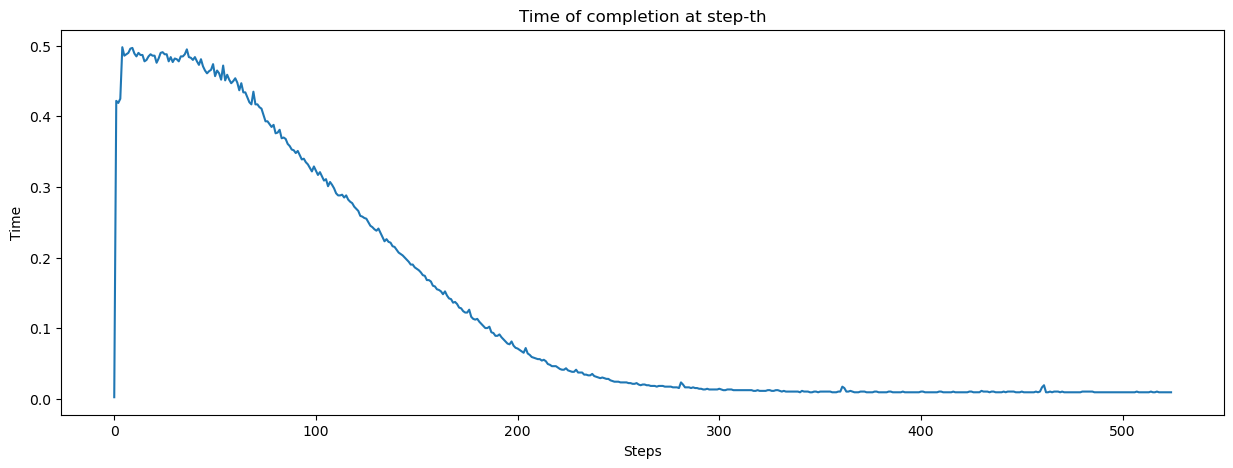

In [6]:
plot_time(time_of_completion)

Text(0.5, 1.0, 'Distribution of amount of steps')

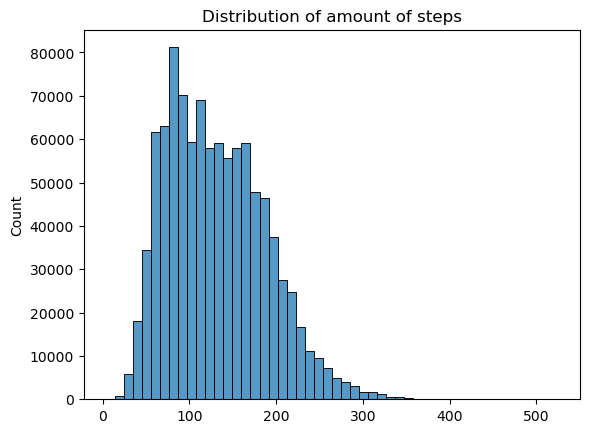

In [7]:
sns.histplot(x=steps_length, bins=50)
plt.title('Distribution of amount of steps')

Text(0.5, 1.0, 'Steps taken to converge to 4-2-1')

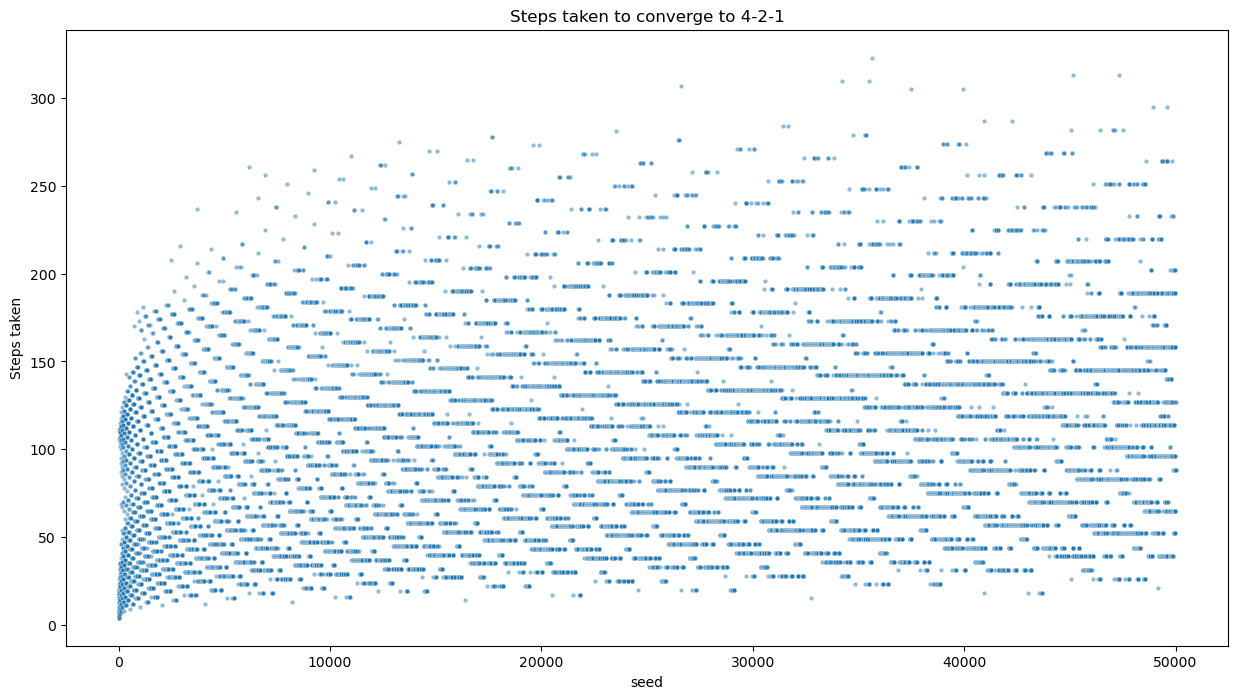

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df.seed[:50000], y=steps_length[:50000], s=10, alpha=0.5)
plt.ylabel('Steps taken')
plt.title('Steps taken to converge to 4-2-1')

There seems to be a rule for steps required to converge regarding the seed? The seeds in a certain range seem to distribute to a few certain numbers of steps

Text(0.5, 1.0, 'Steps taken to converge to 4-2-1')

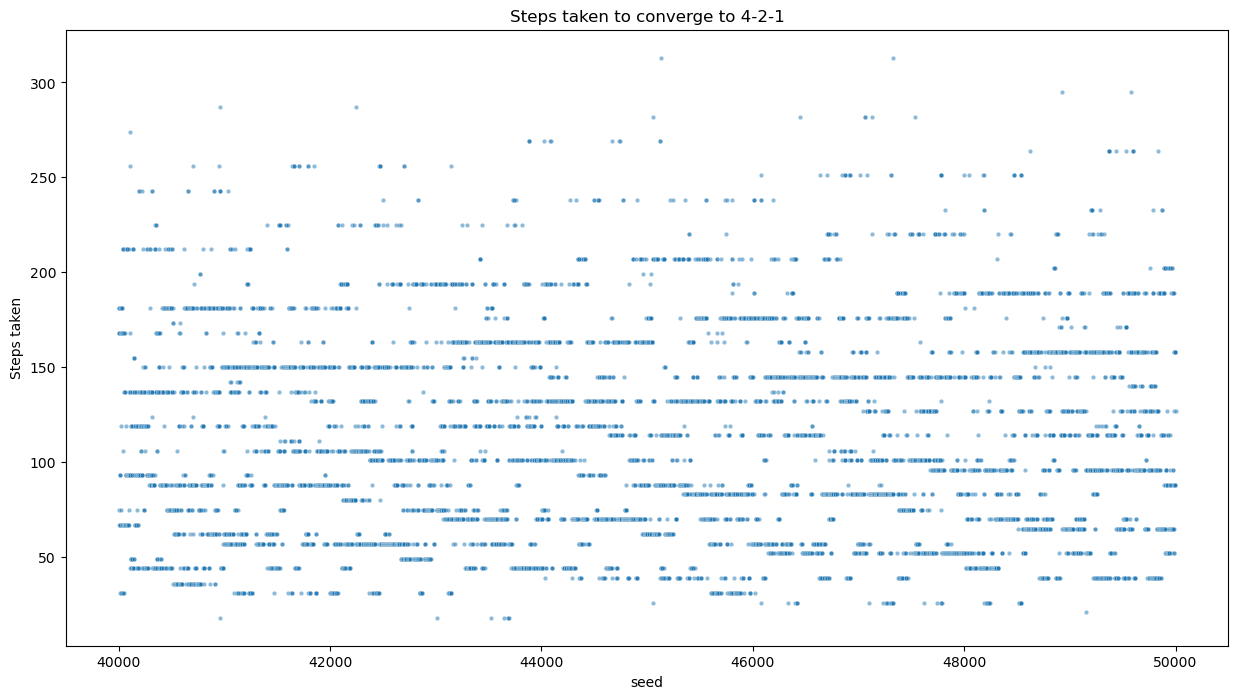

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df.seed[40000:50000], y=steps_length[40000:50000], s=10, alpha=0.5)
plt.ylabel('Steps taken')
plt.title('Steps taken to converge to 4-2-1')

Text(0.5, 1.0, 'Distribution of amount of steps')

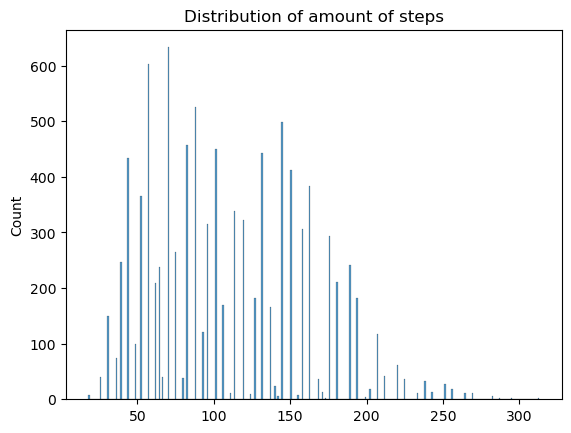

In [26]:
sns.histplot(x=steps_length[40000:50000], bins=steps_length[40000:50000].max())
plt.title('Distribution of amount of steps')

In [27]:
steps_length[40000:50000].value_counts()

70     633
57     603
88     526
145    498
83     457
      ... 
287      2
313      2
295      2
274      1
21       1
Length: 61, dtype: int64

In seed range 40000 - 50000, there are only 61 uniques step length for 10k different seeds